In [2]:
# !pip install icrawler 

https://icrawler.readthedocs.io/en/latest/builtin.html


https://pino93.blog.me/221707621434

In [9]:
from icrawler.builtin import GoogleImageCrawler
import os
download_dir="image/cat/"
if not os.path.exists(download_dir):
    os.makedirs(download_dir)
#     print("make directory")

In [12]:
print("원하는 그림의 키워드를 넣어주세요: ")
kw=input()

원하는 그림의 키워드를 넣어주세요: 
아이유


In [13]:
kw1=kw.split(' ')
print(kw1)

['아이유']


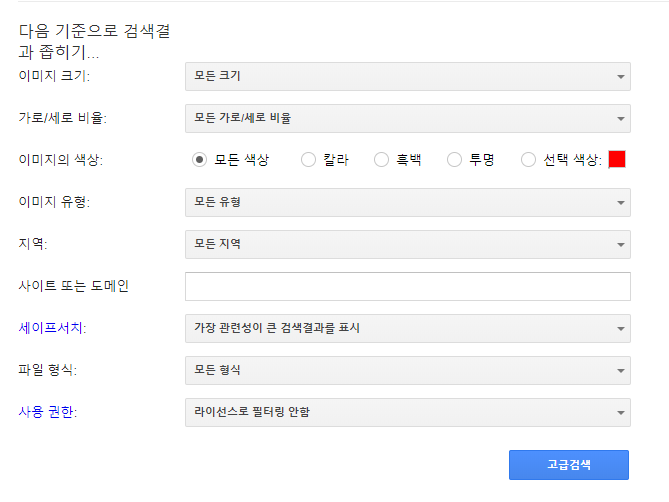

In [14]:
google_crawler=GoogleImageCrawler(
    feeder_threads=1,
    parser_threads=1,
    downloader_threads=4,
    storage={'root_dir':download_dir})



filters=dict(size='small', #이미지 크기
            color='color',#이미지의 색깔을 필터링
            license='commercial,modify',
             #검색하고자 하는 날짜의 범위
            date=((2017,1,1),(2017,12,31)))

google_crawler.crawl(keyword=kw1,
                     filters=filters,
                     max_num=50,
                     file_idx_offset=0)



2020-01-15 10:00:51,733 - INFO - icrawler.crawler - start crawling...
2020-01-15 10:00:51,733 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-01-15 10:00:51,733 - INFO - feeder - thread feeder-001 exit
2020-01-15 10:00:51,737 - INFO - icrawler.crawler - starting 1 parser threads...
2020-01-15 10:00:51,739 - INFO - icrawler.crawler - starting 4 downloader threads...
2020-01-15 10:00:52,259 - INFO - parser - parsing result page https://www.google.com/search?q=%5B%27%EC%95%84%EC%9D%B4%EC%9C%A0%27%5D&ijn=0&start=0&tbs=&tbm=isch
2020-01-15 10:00:52,394 - INFO - downloader - image #1	https://ww.namu.la/s/d3c8c654b4f4426373227ef97849065664c63ea561952378ba77d119c93ccff65f5f03acf75668832d2845bdf7b458445f5711fc6ce1c4b9acf3bda95d88ab0b49755ee9bb52bba3e7d097ed80eedd563eadeed1ee206996a486ece9b08a55ab71730cfcfea1a361c7485c7dbc4133a9
2020-01-15 10:00:52,416 - INFO - downloader - image #2	https://img.huffingtonpost.com/asset/5daa75b2210000f917ad345e.jpeg?cache=gmVf2jqXeu&ops=scalefit_630

2020-01-15 10:00:53,792 - INFO - downloader - thread downloader-001 exit
2020-01-15 10:00:54,859 - INFO - downloader - downloaded images reach max num, thread downloader-004 is ready to exit
2020-01-15 10:00:54,860 - INFO - downloader - thread downloader-004 exit
2020-01-15 10:00:55,739 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2020-01-15 10:00:55,739 - INFO - parser - thread parser-001 exit
2020-01-15 10:00:55,748 - INFO - icrawler.crawler - Crawling task done!


In [15]:
import cv2

In [28]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [60]:
f_name='image/cat/000048'
f_format='.jpg'
img = cv2.imread(f_name+f_format)

In [61]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 7)
tmp_px=20
h_tmp_px=tmp_px//2
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x-h_tmp_px,y-h_tmp_px),(x+w+h_tmp_px,y+h+h_tmp_px),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    


In [62]:
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
roi_color=cv2.resize(roi_color,(100,100),interpolation=cv2.INTER_LINEAR)
w_name=f_name+'_face'+f_format
cv2.imwrite(w_name,roi_color)

True